In [1]:
from elexon import ElexonRawClient
from calendar import monthrange
import datetime
import numpy as np
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm
from sys import exit
from tqdm import tqdm
import os
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

In [29]:
SBuyPrice = pd.read_excel("0.DataSource/ElexonPortal_SSP_SBP.xlsx",sheet_name="SBP")
SBuyPrice['Date'] = pd.to_datetime(SBuyPrice['Date'])
SBuyPrice.drop(['Run'], axis=1,inplace=True)
#SBuyPrice.set_index("Date",inplace=True)

In [30]:
SBuyPrice

,Date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2001-03-27,20.97549,19.58800,22.61021,38.08869,33.67798,39.83499,28.28724,38.18177,24.43990,...,279.38841,251.53062,217.87948,56.96316,30.74486,30.00000,20.69922,22.50088,NaN,NaN
1,2001-03-28,24.21956,33.00606,38.51463,54.92309,70.95632,57.04822,47.75852,51.41475,39.21385,...,97.24102,193.65681,32.98831,349.52532,43.25098,36.52121,65.51957,57.17138,NaN,NaN
2,2001-03-29,98.59603,63.34568,32.32387,38.84969,32.39927,53.39075,30.62564,38.26297,31.60131,...,144.92755,390.60470,662.13826,914.76630,262.19745,185.72044,20.23791,17.29615,NaN,NaN
3,2001-03-30,23.39333,23.72748,27.00277,31.89989,34.58617,33.67641,30.08851,28.58215,20.71600,...,29.08666,848.86219,311.27570,61.76475,191.99345,110.09488,25.36472,22.76406,NaN,NaN
4,2001-03-31,32.20507,31.17349,32.93606,48.93056,43.35069,44.32983,42.68181,35.60474,33.23748,...,251.39846,865.83405,853.61869,582.73810,103.94630,79.36612,43.67538,56.03893,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,2024-03-18,91.75000,85.00000,84.00000,64.57000,54.00000,51.03000,50.57000,48.60000,48.70000,...,66.63000,25.00000,51.97000,35.89000,62.00000,0.79300,78.87000,0.00000,NaN,NaN
8393,2024-03-19,42.22000,81.50000,78.84000,72.50000,-20.00000,43.04000,45.95000,20.52400,81.50000,...,65.00000,54.06000,88.00000,95.00000,55.04000,55.04000,88.00000,88.00000,NaN,NaN
8394,2024-03-20,55.64000,88.00000,88.00000,67.26000,68.81000,66.19000,65.19000,64.73000,89.00000,...,78.69000,72.86000,58.12000,51.25000,89.80000,89.80000,57.92000,84.00000,NaN,NaN
8395,2024-03-21,57.92000,57.92000,53.01000,0.10000,0.10000,53.00000,86.90000,54.73000,85.00000,...,54.80000,60.37000,51.02000,53.80000,45.01000,23.84000,5.00000,5.00000,NaN,NaN


In [31]:
Columns = SBuyPrice.columns[1:]
Years = tqdm(range(2024,2024+1))
DataFrameSBP = pd.DataFrame(columns=["Date","Year","Month","Day","SettlementPeriod","SBP(GBP/MWh)"])
for Year in Years:
    YearDFPrice = SBuyPrice.loc[(SBuyPrice["Date"].dt.year == Year)]
    for Month in range(1,2+1):
        Years.set_description(f'{Year}-{Month} ##>>')
        MonthDFPrice = YearDFPrice.loc[(YearDFPrice["Date"].dt.month == Month)]
        Days = monthrange(Year,Month)[1]
        for Day in range(1,Days+1):
            #Years.set_description(f'{Year}-{Month}-{Day} ##>>')
            Date = datetime.date(Year,Month,Day)
            DatePrint = f"{Year}-{Month}-{Day}"
            DayDFPrice = MonthDFPrice.loc[(MonthDFPrice["Date"].dt.day == Day)]
            for Label in Columns:
                #Years.set_description(f'{Year}-{Month}-{Day} ## {Label} ##>>')
                DataList = []
                Price = DayDFPrice[Label].values[0]
                if abs(Price) >= 0 :
                    DataList.extend([Date,Year,Month,Day,Label,Price])
                    DataFrameSBP.loc[len(DataFrameSBP), DataFrameSBP.columns] = (DataList)
DataFrameSBP.to_csv("0.DataSource/SystemBuyPrice2024.csv",index=False)
DataFrameSBP

2024-2 ##>>: 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


,Date,Year,Month,Day,SettlementPeriod,SBP(GBP/MWh)
0,2024-01-01,2024,1,1,1,90.0
1,2024-01-01,2024,1,1,2,100.0
2,2024-01-01,2024,1,1,3,57.43
3,2024-01-01,2024,1,1,4,129.83902
4,2024-01-01,2024,1,1,5,110.0
...,...,...,...,...,...,...
2875,2024-02-29,2024,2,29,44,78.91873
2876,2024-02-29,2024,2,29,45,77.0
2877,2024-02-29,2024,2,29,46,77.0
2878,2024-02-29,2024,2,29,47,47.0


In [32]:
SSellPrice = pd.read_excel("0.DataSource/ElexonPortal_SSP_SBP.xlsx",sheet_name="SSP")
SSellPrice['Date'] = pd.to_datetime(SSellPrice['Date'])
SSellPrice.drop(['Run'], axis=1,inplace=True)

In [33]:
SBuyPrice

,Date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2001-03-27,20.97549,19.58800,22.61021,38.08869,33.67798,39.83499,28.28724,38.18177,24.43990,...,279.38841,251.53062,217.87948,56.96316,30.74486,30.00000,20.69922,22.50088,NaN,NaN
1,2001-03-28,24.21956,33.00606,38.51463,54.92309,70.95632,57.04822,47.75852,51.41475,39.21385,...,97.24102,193.65681,32.98831,349.52532,43.25098,36.52121,65.51957,57.17138,NaN,NaN
2,2001-03-29,98.59603,63.34568,32.32387,38.84969,32.39927,53.39075,30.62564,38.26297,31.60131,...,144.92755,390.60470,662.13826,914.76630,262.19745,185.72044,20.23791,17.29615,NaN,NaN
3,2001-03-30,23.39333,23.72748,27.00277,31.89989,34.58617,33.67641,30.08851,28.58215,20.71600,...,29.08666,848.86219,311.27570,61.76475,191.99345,110.09488,25.36472,22.76406,NaN,NaN
4,2001-03-31,32.20507,31.17349,32.93606,48.93056,43.35069,44.32983,42.68181,35.60474,33.23748,...,251.39846,865.83405,853.61869,582.73810,103.94630,79.36612,43.67538,56.03893,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,2024-03-18,91.75000,85.00000,84.00000,64.57000,54.00000,51.03000,50.57000,48.60000,48.70000,...,66.63000,25.00000,51.97000,35.89000,62.00000,0.79300,78.87000,0.00000,NaN,NaN
8393,2024-03-19,42.22000,81.50000,78.84000,72.50000,-20.00000,43.04000,45.95000,20.52400,81.50000,...,65.00000,54.06000,88.00000,95.00000,55.04000,55.04000,88.00000,88.00000,NaN,NaN
8394,2024-03-20,55.64000,88.00000,88.00000,67.26000,68.81000,66.19000,65.19000,64.73000,89.00000,...,78.69000,72.86000,58.12000,51.25000,89.80000,89.80000,57.92000,84.00000,NaN,NaN
8395,2024-03-21,57.92000,57.92000,53.01000,0.10000,0.10000,53.00000,86.90000,54.73000,85.00000,...,54.80000,60.37000,51.02000,53.80000,45.01000,23.84000,5.00000,5.00000,NaN,NaN


In [34]:
Columns = SSellPrice.columns[1:]
Years = tqdm(range(2024,2024+1))
DataFrameSSP = pd.DataFrame(columns=["Date","Year","Month","Day","SettlementPeriod","SSP(GBP/MWh)"])
for Year in Years:
    YearDFPrice = SSellPrice.loc[(SSellPrice["Date"].dt.year == Year)]
    for Month in range(1,2+1):
        Years.set_description(f'{Year}-{Month} ##>>')
        MonthDFPrice = YearDFPrice.loc[(YearDFPrice["Date"].dt.month == Month)]
        Days = monthrange(Year,Month)[1]
        for Day in range(1,Days+1):
            #Years.set_description(f'{Year}-{Month}-{Day} ##>>')
            Date = datetime.date(Year,Month,Day)
            DatePrint = f"{Year}-{Month}-{Day}"
            DayDFPrice = MonthDFPrice.loc[(MonthDFPrice["Date"].dt.day == Day)]
            for Label in Columns:
                #Years.set_description(f'{Year}-{Month}-{Day} ## {Label} ##>>')
                DataList = []
                Price = DayDFPrice[Label].values[0]
                if abs(Price) >= 0 :
                    DataList.extend([Date,Year,Month,Day,Label,Price])
                    DataFrameSSP.loc[len(DataFrameSSP), DataFrameSSP.columns] = (DataList)
DataFrameSSP.to_csv("0.DataSource/SystemSellPrice2024.csv",index=False)
DataFrameSSP

2024-2 ##>>: 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


,Date,Year,Month,Day,SettlementPeriod,SSP(GBP/MWh)
0,2024-01-01,2024,1,1,1,90.0
1,2024-01-01,2024,1,1,2,100.0
2,2024-01-01,2024,1,1,3,57.43
3,2024-01-01,2024,1,1,4,129.83902
4,2024-01-01,2024,1,1,5,110.0
...,...,...,...,...,...,...
2875,2024-02-29,2024,2,29,44,78.91873
2876,2024-02-29,2024,2,29,45,77.0
2877,2024-02-29,2024,2,29,46,77.0
2878,2024-02-29,2024,2,29,47,47.0


In [26]:
Difference = pd.DataFrame()
Difference["Date"] = DataFrameSSP["Date"]
Difference["SettlementPeriod"] = DataFrameSSP["SettlementPeriod"]
Difference["Differences"] = DataFrameSSP["SSP(GBP/MWh)"] - DataFrameSBP["SBP(GBP/MWh)"]
# SSP is paid to parties with net-surplus. 
# SBP is paid to parties with net-deficit.
Difference

,Date,SettlementPeriod,Differences
0,2009-01-01,1,-16.69388
1,2009-01-01,2,-18.56376
2,2009-01-01,3,-23.42902
3,2009-01-01,4,-12.6611
4,2009-01-01,5,-10.3
...,...,...,...
262939,2023-12-31,44,0.0
262940,2023-12-31,45,0.0
262941,2023-12-31,46,0.0
262942,2023-12-31,47,0.0


In [2]:
HalfHourlyDF = pd.read_csv("0.DataSource/National Demand/df_fuel_ckan_WithDemand.csv")
HalfHourlyDF['DATETIME'] = pd.to_datetime(HalfHourlyDF['DATETIME'])
HalfHourlyDF = HalfHourlyDF.loc[(HalfHourlyDF['DATETIME'].dt.year >= 2009) & (HalfHourlyDF['DATETIME'].dt.year <= 2023)]
HalfHourlyDF['SSP-SBP'] = HalfHourlyDF["SSP(GBP/MWh)"] - HalfHourlyDF["SBP(GBP/MWh)"]

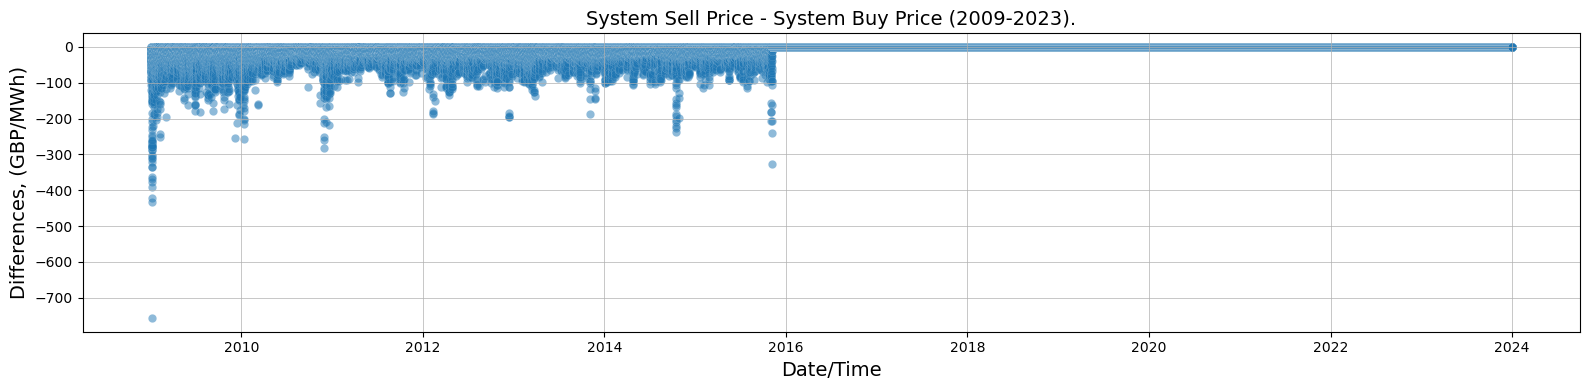

In [3]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=HalfHourlyDF, x="DATETIME", y="SSP-SBP",linewidth=0.1,alpha=0.5)
plt.title("System Sell Price - System Buy Price (2009-2023).",fontsize=14)
plt.xlabel("Date/Time",fontsize=14)
plt.ylabel("Differences, (GBP/MWh)",fontsize=14)
plt.grid(which='both',linewidth = 0.5)
plt.tight_layout()

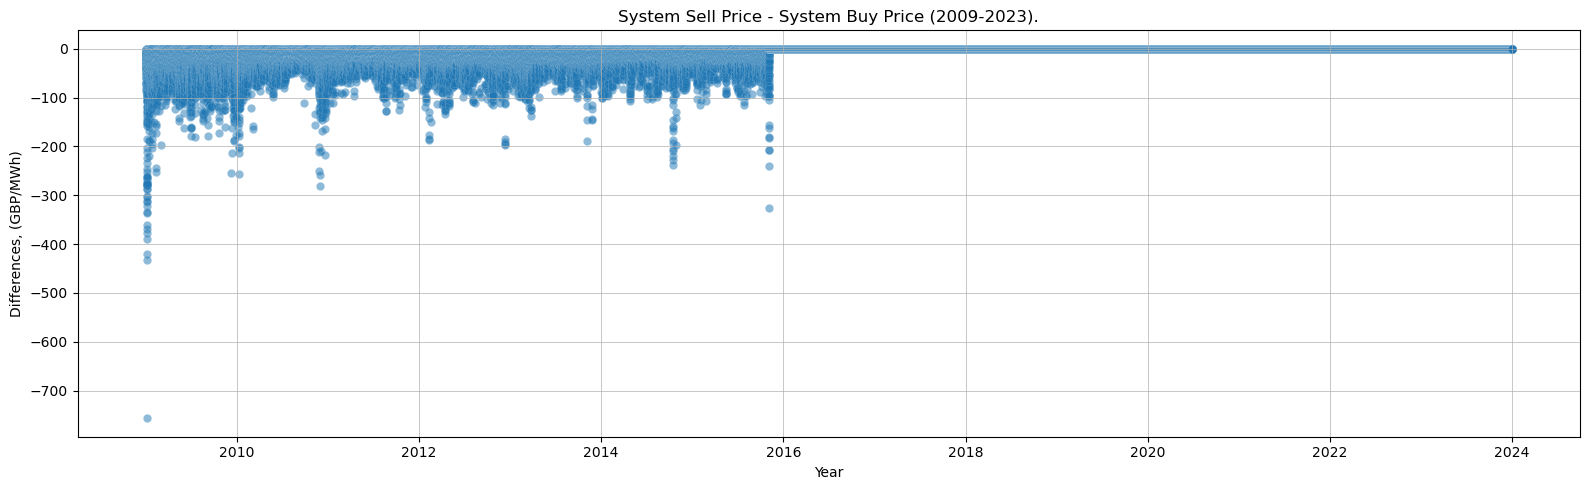

In [44]:
plt.figure(figsize=(16,5))
sns.scatterplot(data=Difference, x="Date", y="Differences",linewidth=0.1,alpha=0.5)
plt.title("System Sell Price - System Buy Price (2009-2023).",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Differences, (GBP/MWh)",fontsize=14)
plt.grid(which='both',linewidth = 0.5)
plt.tight_layout()